# 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# 2. Set Default Values

In [2]:
k = 10 # k-fold cross validation
seed = 12 # 12 ears
y = 'OverallPoF' # target
hyper_params = { # hyper parameters
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ], 
    'gamma': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
}

# 3. Model with OG Samples

### Read Data

In [3]:
sample = '00 - Dataset/03 - Sampling Splits/00 - Original/'

In [4]:
X_train = pd.read_csv(sample + 'X_train.csv')
y_train = pd.read_csv(sample + 'y_train.csv')
X_test = pd.read_csv(sample + 'X_test.csv')
y_test = pd.read_csv(sample + 'y_test.csv')

### Scaling Data

In [5]:
og_scaler = StandardScaler()
X_train = pd.DataFrame(og_scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(og_scaler.transform(X_test), columns = X_test.columns)

### Finding Optimal Parameters

In [6]:
base_mdl = SVC(class_weight = 'balanced', random_state = seed, kernel = 'linear')
grid = GridSearchCV(
    cv = k,
    n_jobs = -1, # use all cpu cores
    estimator = base_mdl,
    scoring = 'f1_weighted',
    param_grid = hyper_params,
)
grid.fit(X_train, y_train[ y ])
grid.best_params_

{'C': 0.01, 'gamma': 0.001}

### Refit Model with Optimum Parameters

In [7]:
og_svc = SVC(
    kernel = 'linear',
    random_state = seed,
    class_weight = 'balanced', 
    C = 0.01,
    gamma = 0.001
)
og_svc.fit(X_train, y_train[ y ])

SVC(C=0.01, class_weight='balanced', gamma=0.001, kernel='linear',
    random_state=12)

### Performance Analysis

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       160
           1       0.91      1.00      0.95        31

    accuracy                           0.98       191
   macro avg       0.96      0.99      0.97       191
weighted avg       0.99      0.98      0.98       191



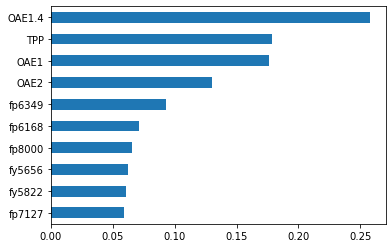

In [8]:
print(classification_report(y_train, og_svc.predict(X_train)))
coef_plot = pd.Series(
    data = abs(og_svc.coef_[ 0 ]), 
    index = og_svc.feature_names_in_
).nlargest(10).sort_values().plot(kind = 'barh')

# 4. Model with ENN Samples

### Read Data

In [9]:
sample = '00 - Dataset/03 - Sampling Splits/01 - ENN/'

In [10]:
X_train = pd.read_csv(sample + 'X_train.csv')
y_train = pd.read_csv(sample + 'y_train.csv')
X_test = pd.read_csv(sample + 'X_test.csv')
y_test = pd.read_csv(sample + 'y_test.csv')

### Scaling Data

In [11]:
enn_scaler = StandardScaler()
X_train = pd.DataFrame(enn_scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(enn_scaler.transform(X_test), columns = X_test.columns)

### Finding Optimal Parameters

In [12]:
base_mdl = SVC(class_weight = 'balanced', random_state = seed, kernel = 'linear')
grid = GridSearchCV(
    cv = k,
    n_jobs = -1, # use all cpu cores
    estimator = base_mdl,
    scoring = 'f1_weighted',
    param_grid = hyper_params,
)
grid.fit(X_train, y_train[ y ])
grid.best_params_

{'C': 0.01, 'gamma': 0.001}

### Refit Model with Optimum Parameters

In [13]:
enn_svc = SVC(
    kernel = 'linear',
    random_state = seed,
    class_weight = 'balanced', 
    C = 0.01,
    gamma = 0.001,
)
enn_svc.fit(X_train, y_train[ y ])

SVC(C=0.01, class_weight='balanced', gamma=0.001, kernel='linear',
    random_state=12)

### Performance Analysis

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       113
           1       0.97      0.94      0.95        31

    accuracy                           0.98       144
   macro avg       0.97      0.96      0.97       144
weighted avg       0.98      0.98      0.98       144



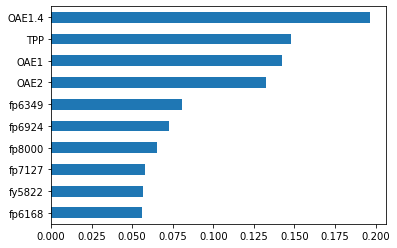

In [14]:
print(classification_report(y_train, enn_svc.predict(X_train)))
coef_plot = pd.Series(
    data = abs(enn_svc.coef_[ 0 ]), 
    index = enn_svc.feature_names_in_
).nlargest(10).sort_values().plot(kind = 'barh')

# 5. Model with SMOTE Samples

### Read Data

In [15]:
sample = '00 - Dataset/03 - Sampling Splits/02 - SMOTE/'

In [16]:
X_train = pd.read_csv(sample + 'X_train.csv')
y_train = pd.read_csv(sample + 'y_train.csv')
X_test = pd.read_csv(sample + 'X_test.csv')
y_test = pd.read_csv(sample + 'y_test.csv')

### Scaling Data

In [17]:
smt_scaler = StandardScaler()
X_train = pd.DataFrame(smt_scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(smt_scaler.transform(X_test), columns = X_test.columns)

### Finding Optimal Parameters

In [18]:
base_mdl = SVC(class_weight = 'balanced', random_state = seed, kernel = 'linear')
grid = GridSearchCV(
    cv = k,
    n_jobs = -1, # use all cpu cores
    estimator = base_mdl,
    scoring = 'f1_weighted',
    param_grid = hyper_params,
)
grid.fit(X_train, y_train[ y ])
grid.best_params_

{'C': 1, 'gamma': 0.001}

### Refit Model with Optimum Parameters

In [19]:
smt_svc = SVC(
    kernel = 'linear',
    random_state = seed,
    class_weight = 'balanced', 
    C = 1,
    gamma = 0.001,
)
smt_svc.fit(X_train, y_train[ y ])

SVC(C=1, class_weight='balanced', gamma=0.001, kernel='linear', random_state=12)

### Performance Analysis

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



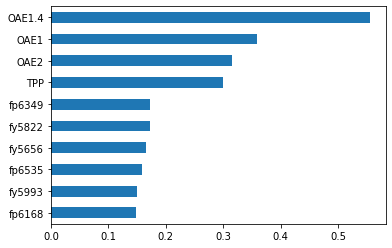

In [20]:
print(classification_report(y_train, smt_svc.predict(X_train)))
coef_plot = pd.Series(
    data = abs(smt_svc.coef_[ 0 ]), 
    index = smt_svc.feature_names_in_
).nlargest(10).sort_values().plot(kind = 'barh')

# 6. Model with SMOTEENN Samples

### Read Data

In [21]:
sample = '00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/'

In [22]:
X_train = pd.read_csv(sample + 'X_train.csv')
y_train = pd.read_csv(sample + 'y_train.csv')
X_test = pd.read_csv(sample + 'X_test.csv')
y_test = pd.read_csv(sample + 'y_test.csv')

### Scaling Data

In [23]:
sen_scaler = StandardScaler()
X_train = pd.DataFrame(sen_scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sen_scaler.transform(X_test), columns = X_test.columns)

### Finding Optimal Parameters

In [24]:
base_mdl = SVC(class_weight = 'balanced', random_state = seed, kernel = 'linear')
grid = GridSearchCV(
    cv = k,
    n_jobs = -1, # use all cpu cores
    estimator = base_mdl,
    scoring = 'f1_weighted',
    param_grid = hyper_params,
)
grid.fit(X_train, y_train[ y ])
grid.best_params_

{'C': 0.1, 'gamma': 0.001}

### Refit Model with Optimum Parameters

In [25]:
sen_svc = SVC(
    kernel = 'linear',
    random_state = seed,
    class_weight = 'balanced', 
    C = 0.1,
    gamma = 0.001,
)
sen_svc.fit(X_train, y_train[ y ])

SVC(C=0.1, class_weight='balanced', gamma=0.001, kernel='linear',
    random_state=12)

### Performance Analysis

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       160

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



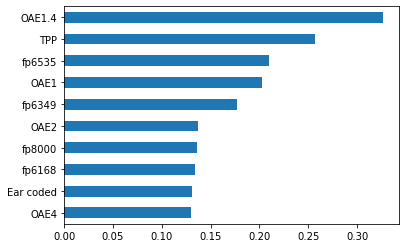

In [26]:
print(classification_report(y_train, sen_svc.predict(X_train)))
coef_plot = pd.Series(
    data = abs(sen_svc.coef_[ 0 ]), 
    index = sen_svc.feature_names_in_
).nlargest(10).sort_values().plot(kind = 'barh')

# 6. Comparison on Test

In [27]:
print(classification_report(y_test, og_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.88      1.00      0.93         7

    accuracy                           0.98        48
   macro avg       0.94      0.99      0.96        48
weighted avg       0.98      0.98      0.98        48



In [28]:
print(classification_report(y_test, enn_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.88      1.00      0.93         7

    accuracy                           0.98        48
   macro avg       0.94      0.99      0.96        48
weighted avg       0.98      0.98      0.98        48



In [29]:
print(classification_report(y_test, smt_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.88      1.00      0.93         7

    accuracy                           0.98        48
   macro avg       0.94      0.99      0.96        48
weighted avg       0.98      0.98      0.98        48



In [30]:
print(classification_report(y_test, sen_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.54      1.00      0.70         7

    accuracy                           0.88        48
   macro avg       0.77      0.93      0.81        48
weighted avg       0.93      0.88      0.89        48



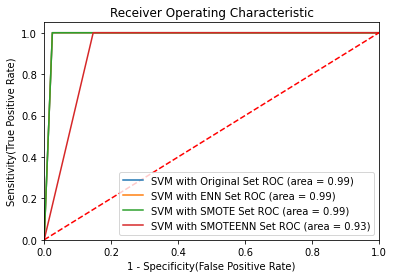

In [33]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'SVM with Original Set',
        'model': og_svc,
    },
    {
        'label': 'SVM with ENN Set',
        'model': enn_svc,
    },
    {
        'label': 'SVM with SMOTE Set',
        'model': smt_svc,
    },
    {
        'label': 'SVM with SMOTEENN Set',
        'model': sen_svc,
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m[ 'model' ] # select the model
    y_pred = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test, y_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)' % (m[ 'label' ], auc))
# Custom settings for the plot 
plt.plot([ 0, 1 ], [ 0, 1 ],'r--')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ 0.0, 1.05 ])
plt.xlabel('1 - Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()   # Display